# Proyek Analisis Data: Air Quality Dataset (PRSA Data Tiantan)
- **Nama:** Muhammad Zia Ulhaq
- **Email:** ziaswatfbicia@gmail
- **ID Dicoding:** zia1705

## Menentukan Pertanyaan Bisnis

- Seberapa besar proporsi masing-masing tingkat polusi udara di Kota Tiantan?
- Variabel apa yang paling berpengaruh dalam menentukan level polusi udara Kota Tiantan?
- Bagaimana trend kualitas udara Kota Tiantan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [2]:
url = "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv"
tiantan_df = pd.read_csv(url)
tiantan_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


### Assessing Data

In [3]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


terdapat beberapa type data yang belum sesuai

In [4]:
tiantan_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [5]:
print("Jumlah duplikasi: ", tiantan_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

Mengubah type data sebagaimana mestinya

In [6]:
tiantan_df['year'] = tiantan_df['year'].astype('category')
tiantan_df['month'] = tiantan_df['month'].astype('category')
tiantan_df['day'] = tiantan_df['day'].astype('category')
tiantan_df['hour'] = tiantan_df['hour'].astype('category')

In [7]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   No       35064 non-null  int64   
 1   year     35064 non-null  category
 2   month    35064 non-null  category
 3   day      35064 non-null  category
 4   hour     35064 non-null  category
 5   PM2.5    34387 non-null  float64 
 6   PM10     34467 non-null  float64 
 7   SO2      33946 non-null  float64 
 8   NO2      34320 non-null  float64 
 9   CO       33938 non-null  float64 
 10  O3       34221 non-null  float64 
 11  TEMP     35044 non-null  float64 
 12  PRES     35044 non-null  float64 
 13  DEWP     35044 non-null  float64 
 14  RAIN     35044 non-null  float64 
 15  wd       34986 non-null  object  
 16  WSPM     35050 non-null  float64 
 17  station  35064 non-null  object  
dtypes: category(4), float64(11), int64(1), object(2)
memory usage: 3.9+ MB


Setelah semua data sudah sesuai dengan type datanya, selanjutnya menghilangkan kolom data yang tidak diperlukan dalam analisis data ini. Data Stasiu dapat di hilangkan karena mengandung nilai yang sama dan juga nomor dapat dihilangkan karena dapat mengganggu proses analisis

In [8]:
tiantan_df = tiantan_df.drop(columns = {'station'})
tiantan_df = tiantan_df.drop(columns = {'No'})
tiantan_df.head(5)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9
4,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2


Dalam dataset kali ini, banyak ditemukannya data yang missing value. Untuk mengatasi missing value terdapat banyak cara untuk melakukannya. Dalam proses cleaning kali ini akan dilakukan 2 metode yaitu :
1. Menghilangkan baris yang terdapat missing value. Hal ini dikarenakan dataset ini memiliki puluhan ribu baris yang membuatnya tidak terlalu berpengaruh signifikan.
2. Yang keduang mengganti data yang missing value dengan sebuah nilai. Nilai yang diisi bisa menggunakan nilai mean, median, 0,atau nilai sebelum/sesudah data missing value. Dalam preses cleaning ini merupakan data time series maka salah satu opsi terbaik adalah dengan menggantinya menggunakan nilai antara range atau nilai garis lurus antara nilai sebelumnya dan nilai sesudahnya.

In [9]:
#1. menghapus baris pada dataset yang missing value pada variabel TEMP, PRES, DEWP, RAIN,  wd, dan WSPM.
tiantan_df.dropna(subset=['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'], inplace=True)

#2. mengisi nilai missing values dalam beberapa kolom tertentu dengan metode interpolasi linear.
columns_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
tiantan_df[columns_to_interpolate] = tiantan_df[columns_to_interpolate].interpolate(method='linear')


In [10]:
# Mengecek kembali missing value
tiantan_df.isnull().sum()

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [11]:
tiantan_df.to_csv("D:/Bangkit/Belajar Analisis Data dengan Python/tiantan_clean.csv", index=False)

## Exploratory Data Analysis (EDA)

##### Melihat deskriptif data

In [12]:
tiantan_df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000,34980.000000
mean,82.018139,106.538509,14.526451,53.247843,1304.688551,56.222904,13.687112,1012.537433,2.453548,0.064137,1.863310
std,80.926588,90.326330,20.294639,32.028926,1179.634071,59.484504,11.456090,10.266518,13.813296,0.786996,1.279225
min,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,58.000000,85.000000,7.000000,47.000000,900.000000,40.483800,14.600000,1012.200000,3.100000,0.000000,1.500000
75%,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


##### Memeriksa distribusi data

array([[<AxesSubplot: title={'center': 'PM2.5'}>,
        <AxesSubplot: title={'center': 'PM10'}>,
        <AxesSubplot: title={'center': 'SO2'}>],
       [<AxesSubplot: title={'center': 'NO2'}>,
        <AxesSubplot: title={'center': 'CO'}>,
        <AxesSubplot: title={'center': 'O3'}>],
       [<AxesSubplot: title={'center': 'TEMP'}>,
        <AxesSubplot: title={'center': 'PRES'}>,
        <AxesSubplot: title={'center': 'DEWP'}>],
       [<AxesSubplot: title={'center': 'RAIN'}>,
        <AxesSubplot: title={'center': 'WSPM'}>, <AxesSubplot: >]],
      dtype=object)

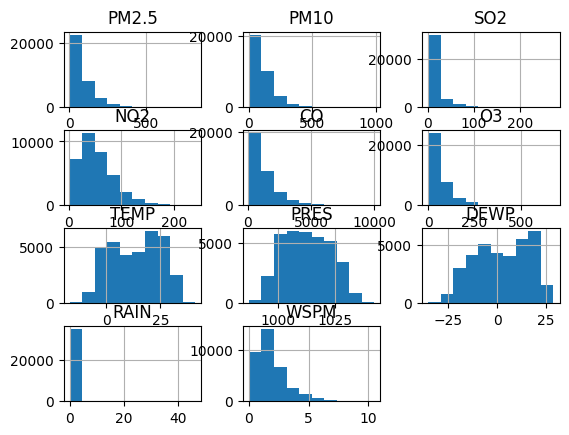

In [13]:
tiantan_df.hist()

##### Melihat korelasi data

In [14]:
tiantan_df.corr()

C:\Users\Asus\AppData\Local\Temp\ipykernel_19016\1615219004.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tiantan_df.corr()


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.891237,0.394558,0.665743,0.801057,-0.169217,-0.152213,0.009397,0.111555,-0.015966,-0.291975
PM10,0.891237,1.000000,0.383704,0.621443,0.716354,-0.118187,-0.119971,-0.021682,0.056254,-0.028529,-0.175053
SO2,0.394558,0.383704,1.000000,0.410185,0.404408,-0.055454,-0.234208,0.170359,-0.227645,-0.038835,-0.043620
NO2,0.665743,0.621443,0.410185,1.000000,0.715412,-0.535645,-0.324063,0.186097,-0.082822,-0.047410,-0.412296
CO,0.801057,0.716354,0.404408,0.715412,1.000000,-0.315289,-0.321087,0.156625,-0.037799,-0.014129,-0.326325
O3,-0.169217,-0.118187,-0.055454,-0.535645,-0.315289,1.000000,0.570801,-0.423669,0.271324,0.018037,0.337941
TEMP,-0.152213,-0.119971,-0.234208,-0.324063,-0.321087,0.570801,1.000000,-0.837422,0.819070,0.038592,0.047530
PRES,0.009397,-0.021682,0.170359,0.186097,0.156625,-0.423669,-0.837422,1.000000,-0.770263,-0.065757,0.039578
DEWP,0.111555,0.056254,-0.227645,-0.082822,-0.037799,0.271324,0.819070,-0.770263,1.000000,0.089386,-0.279715
RAIN,-0.015966,-0.028529,-0.038835,-0.047410,-0.014129,0.018037,0.038592,-0.065757,0.089386,1.000000,0.025425


Dari sumber bacaan https://waqi.info/#/c/6.892/0/2z dapat diketahui bahwa untuk Air Pullution Level dapat di tentukan berdasarkan nilai PM, oleh kerena itu pada dataset akan ditambahkan variabel baru yaitu "Air Pollution Level" yang berisi
- Good(0-50)
- Moderate(51-100)
- UfSG (Unhealty for sensitive groups)(101-150)
- Unhealty(151-200)
- Very Unhealty(201-300)
- Hazardous(300+)

In [15]:
# Membuat fungsi untuk mengkategorikan tingkat polusi udara berdasarkan nilai PM2.5
def categorize_air_pollution_level(pm25_value):
    if pm25_value <= 50:
        return 'Good'
    elif 51 <= pm25_value <= 100:
        return 'Moderate'
    elif 101 <= pm25_value <= 150:
        return 'UfSG'
    elif 151 <= pm25_value <= 200:
        return 'Unhealthy'
    elif 201 <= pm25_value <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Menerapkan fungsi untuk membuat kolom baru 'Air Pollution Level' berdasarkan nilai PM2.5
tiantan_df['Air Pollution Level (PM2.5)'] = tiantan_df['PM2.5'].apply(categorize_air_pollution_level)

# Membuat fungsi untuk mengkategorikan tingkat polusi udara berdasarkan nilai PM10
def categorize_air_pollution_level(pm10_value):
    if pm10_value <= 50:
        return 'Good'
    elif 51 <= pm10_value <= 100:
        return 'Moderate'
    elif 101 <= pm10_value <= 150:
        return 'UfSG'
    elif 151 <= pm10_value <= 200:
        return 'Unhealthy'
    elif 201 <= pm10_value <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Menerapkan fungsi untuk membuat kolom baru 'Air Pollution Level' berdasarkan nilai PM10
tiantan_df['Air Pollution Level (PM10)'] = tiantan_df['PM10'].apply(categorize_air_pollution_level)


In [16]:
tiantan_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,Air Pollution Level (PM2.5),Air Pollution Level (PM10)
0,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Good,Good
1,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Good,Good
2,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Good,Good
3,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Good,Good
4,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Good,Good


In [17]:
tiantan_df.to_csv("D:/Bangkit/Belajar Analisis Data dengan Python/tiantan_last.csv", index=False)

## Visualization & Explanatory Analysis

note : dalam analisis lanjuntan menggunakan air pollution level (PM2.5)

### Pertanyaan 1: Seberapa besar proporsi masing-masing tingkat polusi udara di Kota Tiantan?

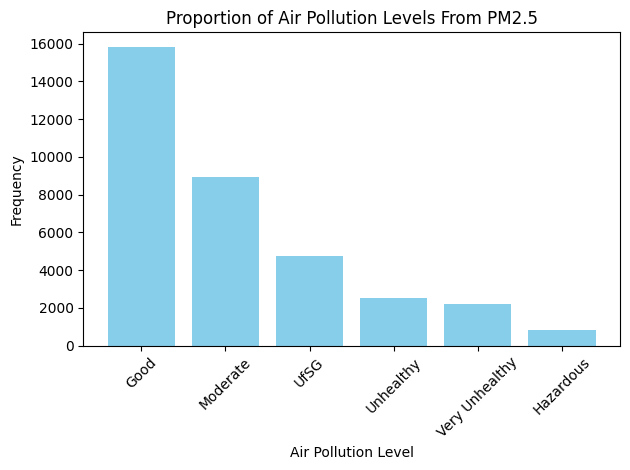

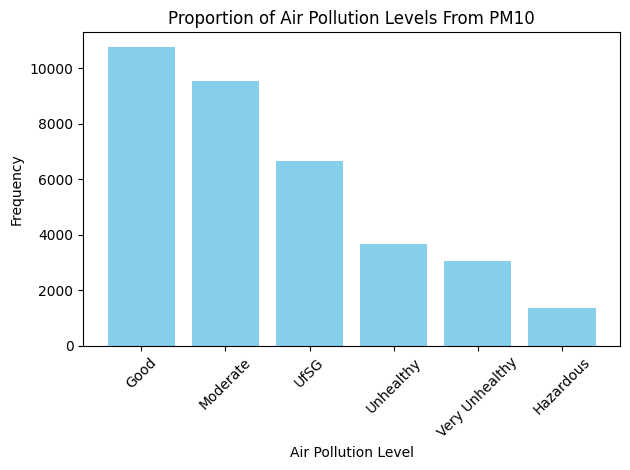

In [18]:
# Menghitung frekuensi setiap tingkat polusi udara (PM2.5)
air_pollution_level_counts = tiantan_df['Air Pollution Level (PM2.5)'].value_counts()

# Membuat bar plot
plt.bar(air_pollution_level_counts.index, air_pollution_level_counts.values, color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Air Pollution Level')
plt.ylabel('Frequency')
plt.title('Proportion of Air Pollution Levels From PM2.5')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()

# Menghitung frekuensi setiap tingkat polusi udara (PM10)
air_pollution_level_counts = tiantan_df['Air Pollution Level (PM10)'].value_counts()

# Membuat bar plot
plt.bar(air_pollution_level_counts.index, air_pollution_level_counts.values, color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Air Pollution Level')
plt.ylabel('Frequency')
plt.title('Proportion of Air Pollution Levels From PM10')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()

In [19]:
# Hitung frekuensi setiap tingkat polusi udara
air_pollution_level_counts = tiantan_df['Air Pollution Level (PM2.5)'].value_counts()

# Hitung total frekuensi semua tingkat polusi udara
total_counts = air_pollution_level_counts.sum()

# Bagi frekuensi masing-masing tingkat polusi udara dengan total frekuensi
proporsi_tingkat_polusi = air_pollution_level_counts / total_counts

# Tampilkan proporsi masing-masing tingkat polusi udara
print(proporsi_tingkat_polusi)


Good              0.451801
Moderate          0.254946
UfSG              0.135163
Unhealthy         0.071841
Very Unhealthy    0.062321
Hazardous         0.023928
Name: Air Pollution Level (PM2.5), dtype: float64


### Pertanyaan 2: Variabel apa yang paling berpengaruh dalam menentukan level polusi udara Kota Tiantan?

Kita bisa mengetahuinya dengan cara melihat dari output boxplot dan barplotnya berdasarkan level udara kota tiantan

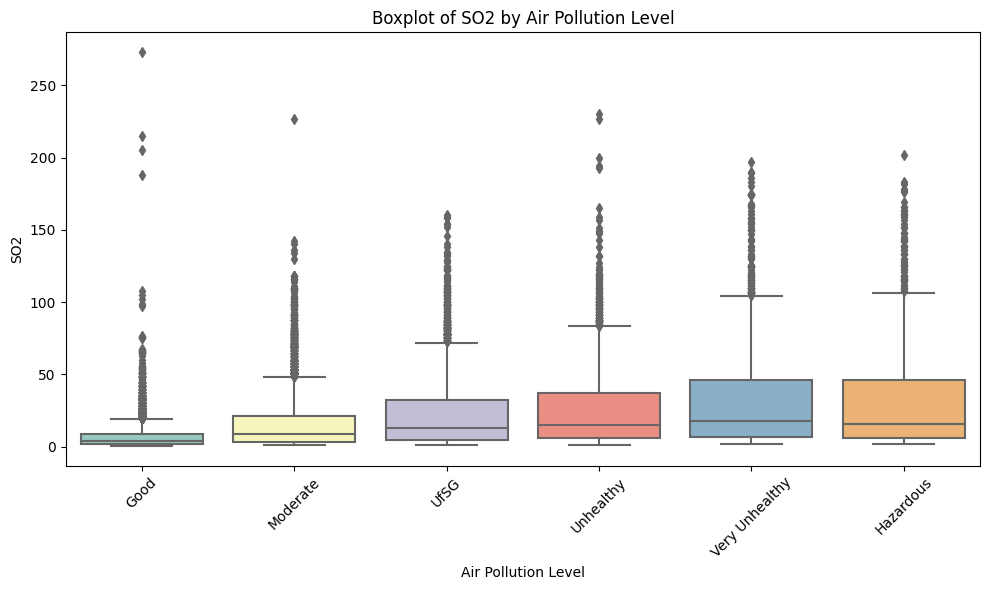

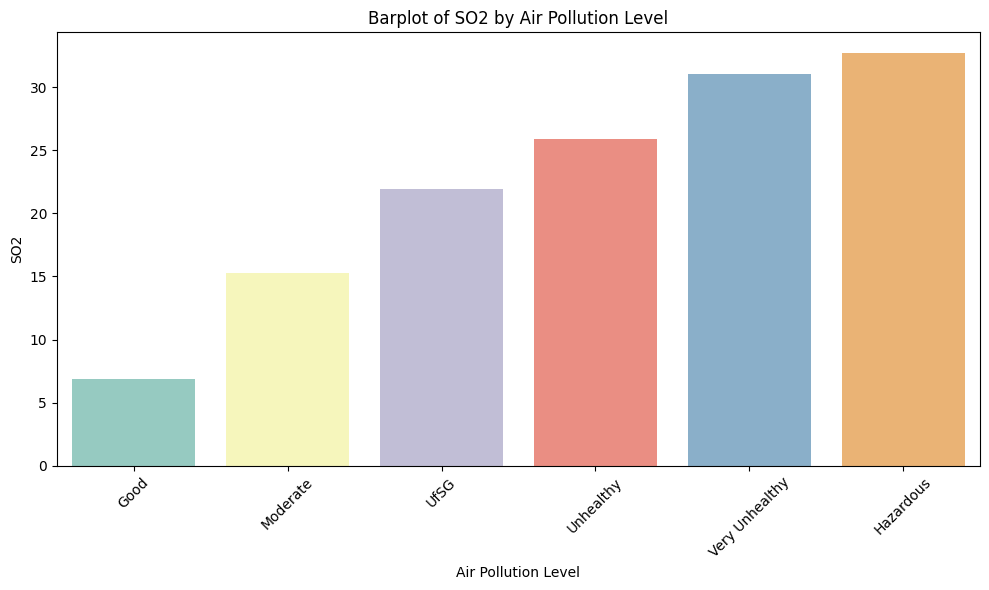

In [20]:
# Visualisasi berdasarkan "SO2"

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Air Pollution Level (PM2.5)', y='SO2', data=tiantan_df, palette='Set3')
plt.xlabel('Air Pollution Level')
plt.ylabel('SO2')
plt.title('Boxplot of SO2 by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Air Pollution Level (PM2.5)', y='SO2', data=tiantan_df, palette='Set3', errorbar=None)
plt.xlabel('Air Pollution Level')
plt.ylabel('SO2')
plt.title('Barplot of SO2 by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

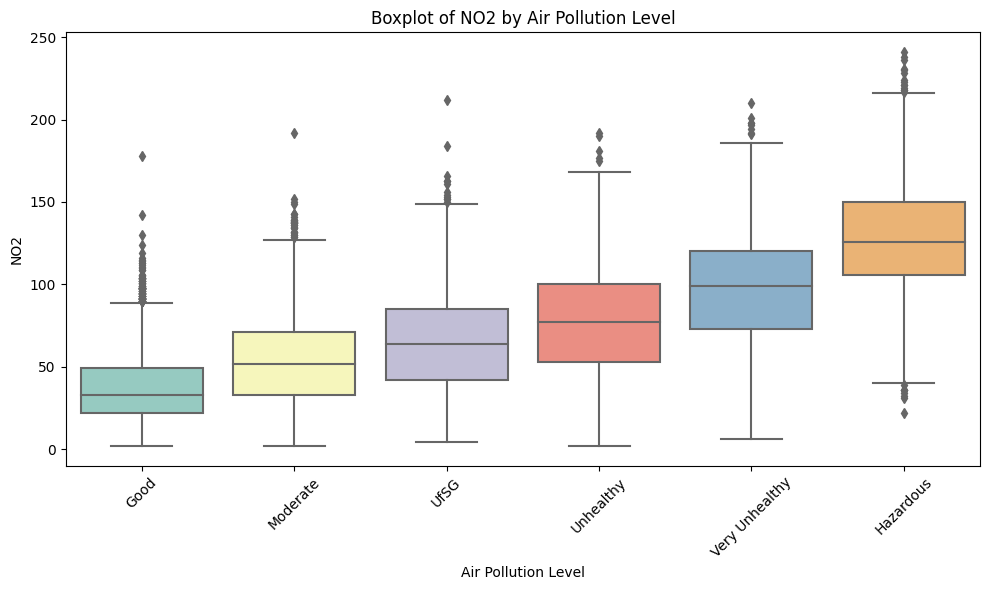

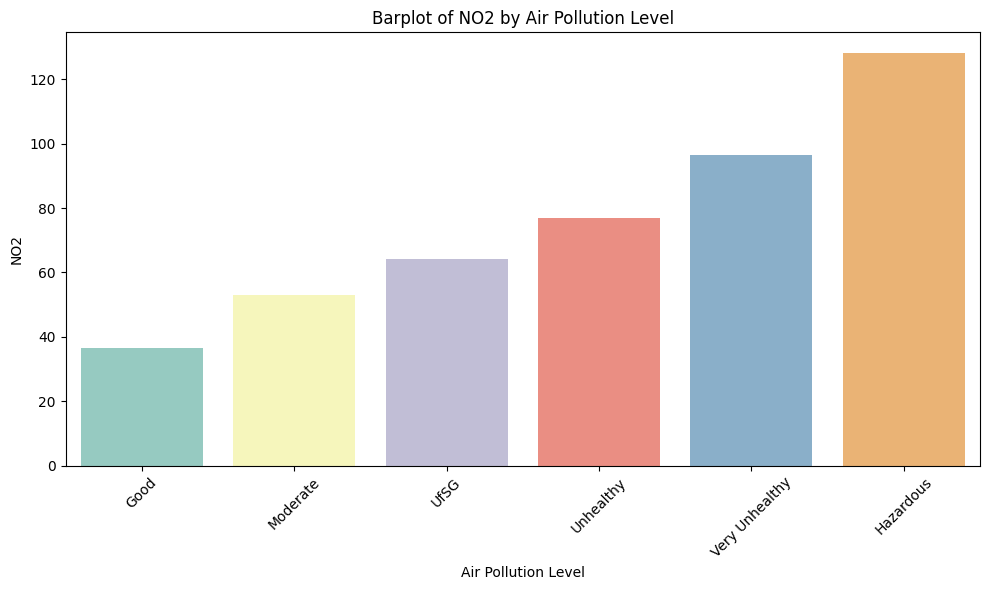

In [21]:
# Visualisasi Berdasarkann "NO2"

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Air Pollution Level (PM2.5)', y='NO2', data=tiantan_df, palette='Set3')
plt.xlabel('Air Pollution Level')
plt.ylabel('NO2')
plt.title('Boxplot of NO2 by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Air Pollution Level (PM2.5)', y='NO2', data=tiantan_df, palette='Set3', errorbar=None)
plt.xlabel('Air Pollution Level')
plt.ylabel('NO2')
plt.title('Barplot of NO2 by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

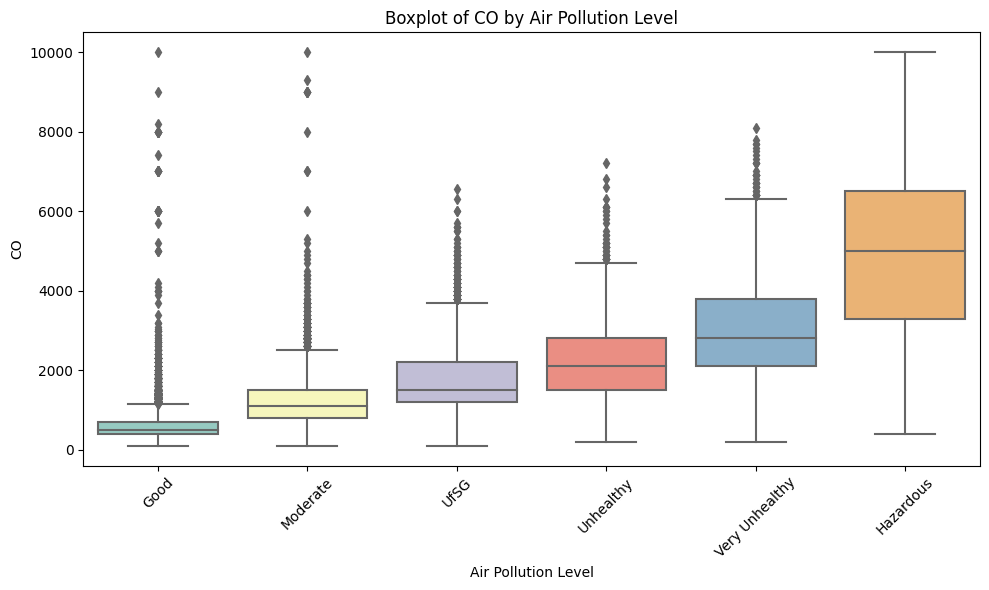

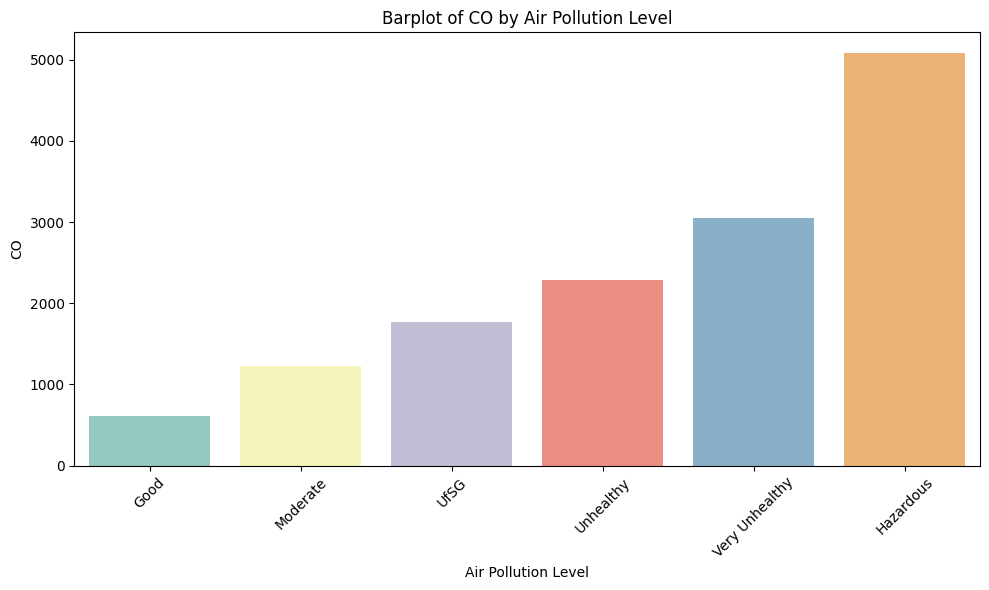

In [22]:
# Visualisasi Berdasarkan "CO"

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Air Pollution Level (PM2.5)', y='CO', data=tiantan_df, palette='Set3')
plt.xlabel('Air Pollution Level')
plt.ylabel('CO')
plt.title('Boxplot of CO by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Air Pollution Level (PM2.5)', y='CO', data=tiantan_df, palette='Set3', errorbar=None)
plt.xlabel('Air Pollution Level')
plt.ylabel('CO')
plt.title('Barplot of CO by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

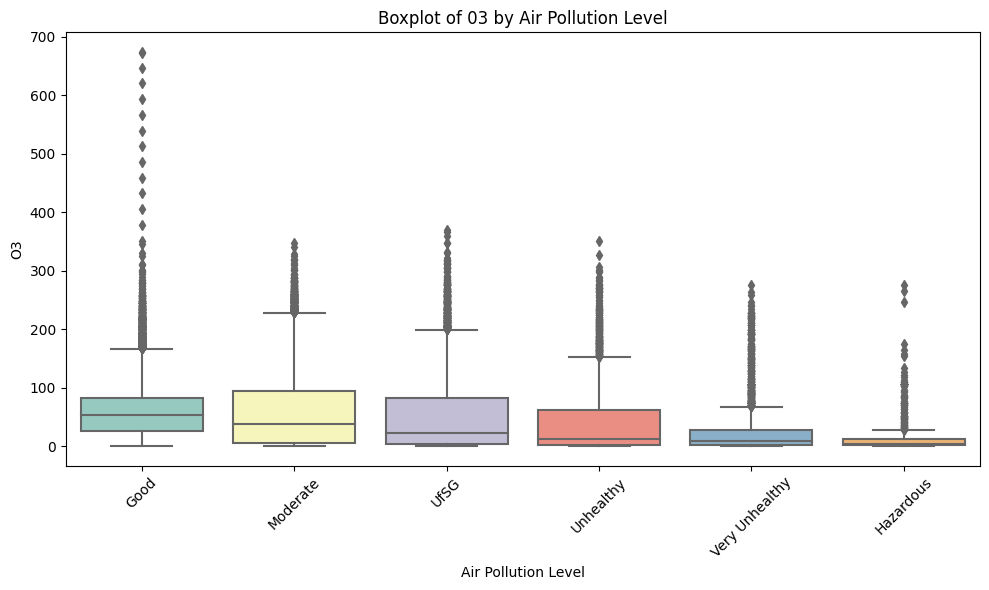

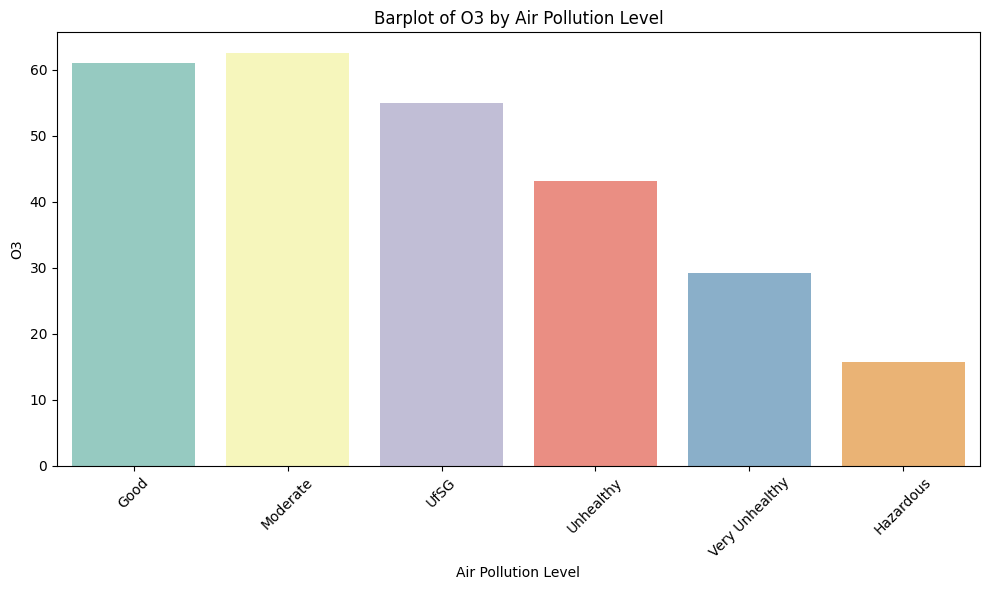

In [23]:
# Visualisasi Berdasarkan "O3"

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Air Pollution Level (PM2.5)', y='O3', data=tiantan_df, palette='Set3')
plt.xlabel('Air Pollution Level')
plt.ylabel('O3')
plt.title('Boxplot of 03 by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Air Pollution Level (PM2.5)', y='O3', data=tiantan_df, palette='Set3', errorbar=None)
plt.xlabel('Air Pollution Level')
plt.ylabel('O3')
plt.title('Barplot of O3 by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

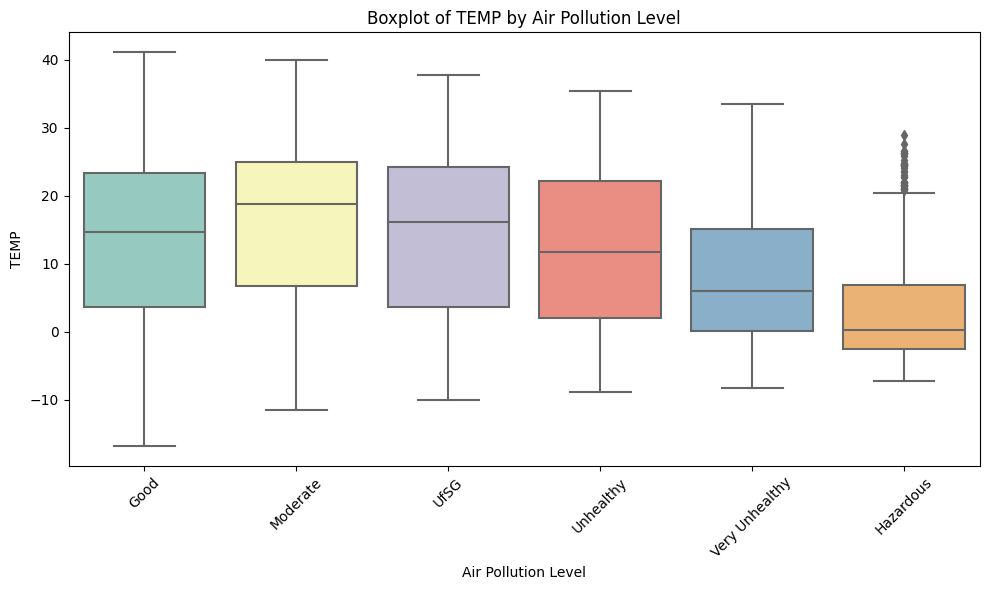

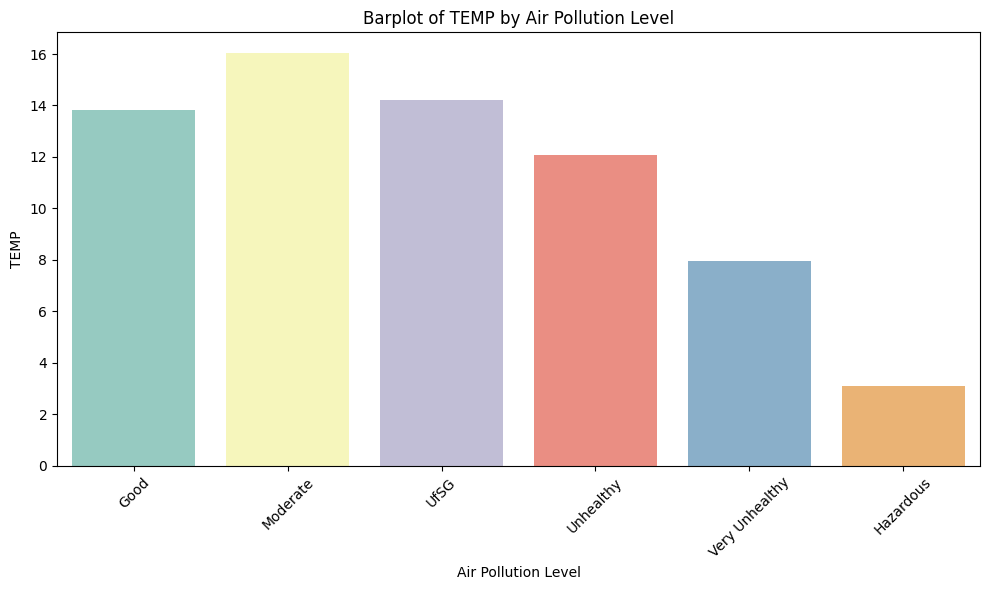

In [24]:
# Berdasarkan "TEMP"

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Air Pollution Level (PM2.5)', y='TEMP', data=tiantan_df, palette='Set3')
plt.xlabel('Air Pollution Level')
plt.ylabel('TEMP')
plt.title('Boxplot of TEMP by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Air Pollution Level (PM2.5)', y='TEMP', data=tiantan_df, palette='Set3', errorbar=None)
plt.xlabel('Air Pollution Level')
plt.ylabel('TEMP')
plt.title('Barplot of TEMP by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

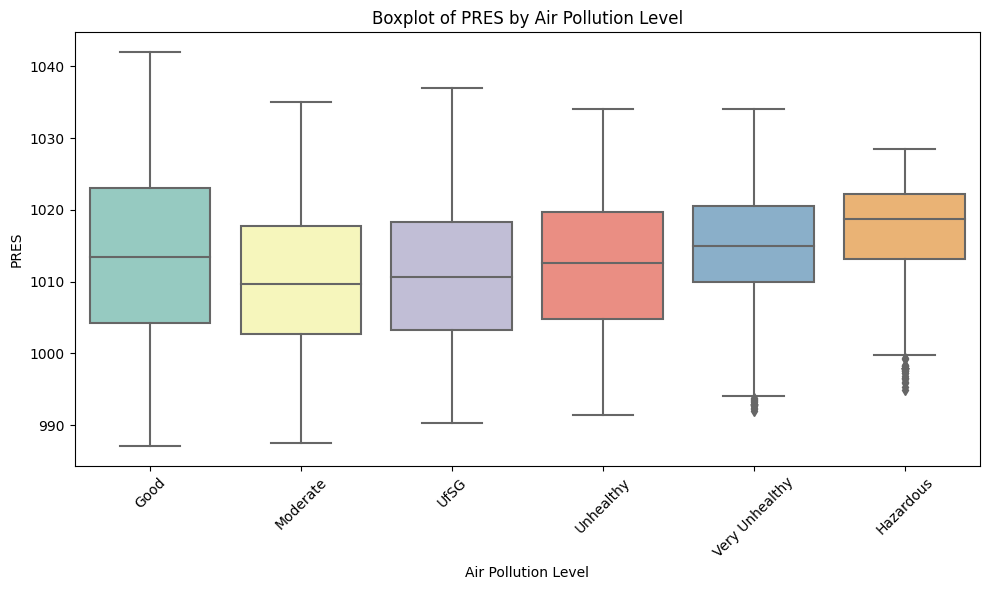

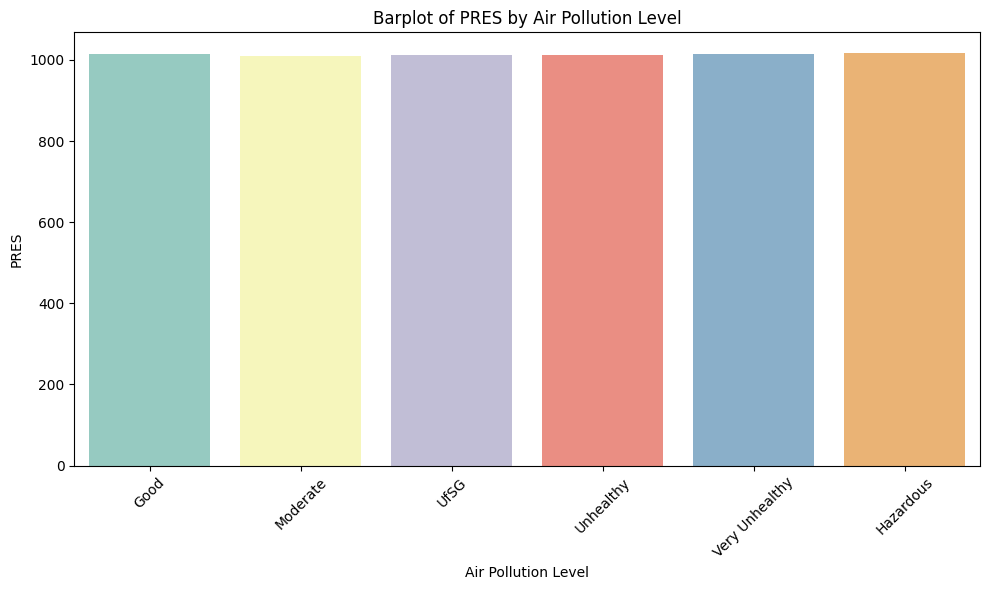

In [25]:
# Berdasarkan "PRES"

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Air Pollution Level (PM2.5)', y='PRES', data=tiantan_df, palette='Set3')
plt.xlabel('Air Pollution Level')
plt.ylabel('PRES')
plt.title('Boxplot of PRES by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Air Pollution Level (PM2.5)', y='PRES', data=tiantan_df, palette='Set3', errorbar=None)
plt.xlabel('Air Pollution Level')
plt.ylabel('PRES')
plt.title('Barplot of PRES by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

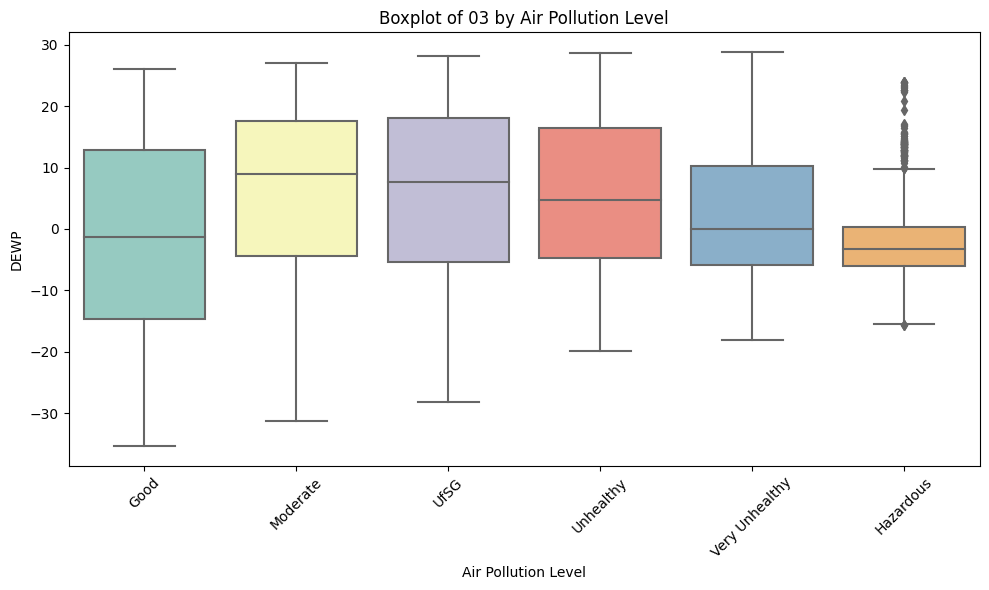

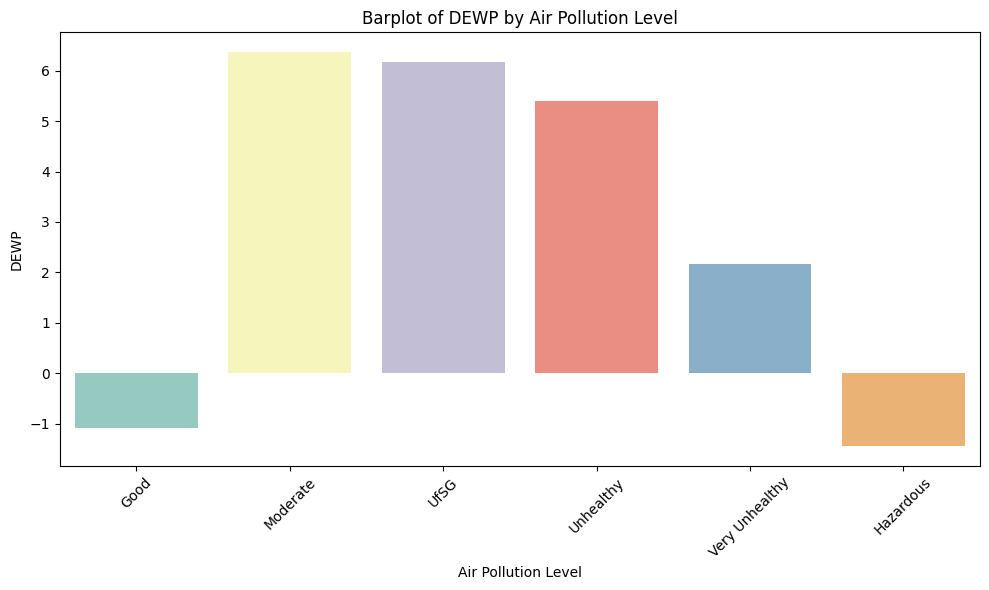

In [26]:
# Visualisasi Berdasarkan "DEWP"

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Air Pollution Level (PM2.5)', y='DEWP', data=tiantan_df, palette='Set3')
plt.xlabel('Air Pollution Level')
plt.ylabel('DEWP')
plt.title('Boxplot of 03 by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Air Pollution Level (PM2.5)', y='DEWP', data=tiantan_df, palette='Set3', errorbar=None)
plt.xlabel('Air Pollution Level')
plt.ylabel('DEWP')
plt.title('Barplot of DEWP by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

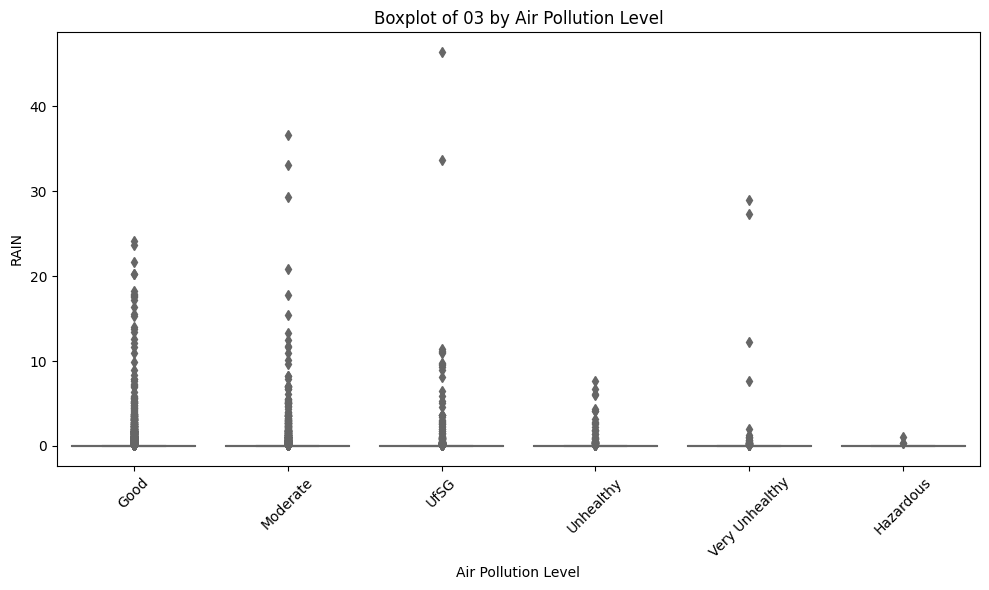

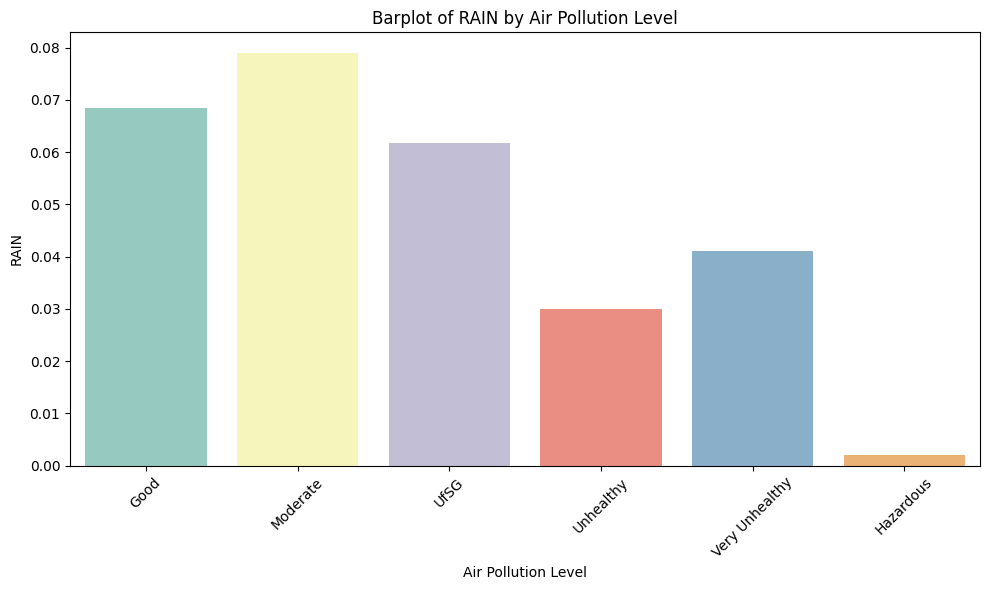

In [27]:
# Visualisasi Bersarkan "RAIN"

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Air Pollution Level (PM2.5)', y='RAIN', data=tiantan_df, palette='Set3')
plt.xlabel('Air Pollution Level')
plt.ylabel('RAIN')
plt.title('Boxplot of 03 by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Air Pollution Level (PM2.5)', y='RAIN', data=tiantan_df, palette='Set3', errorbar=None)
plt.xlabel('Air Pollution Level')
plt.ylabel('RAIN')
plt.title('Barplot of RAIN by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

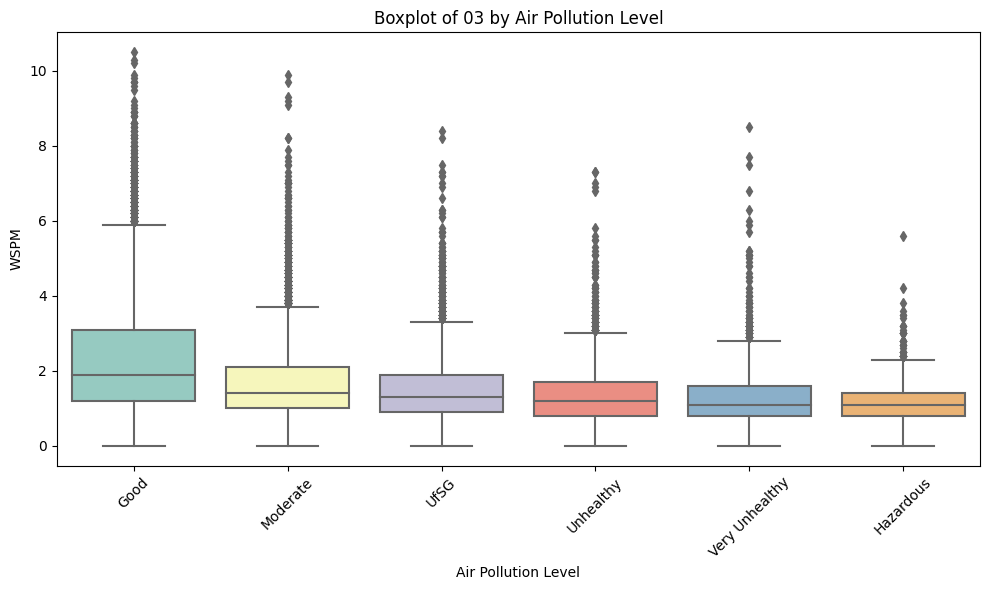

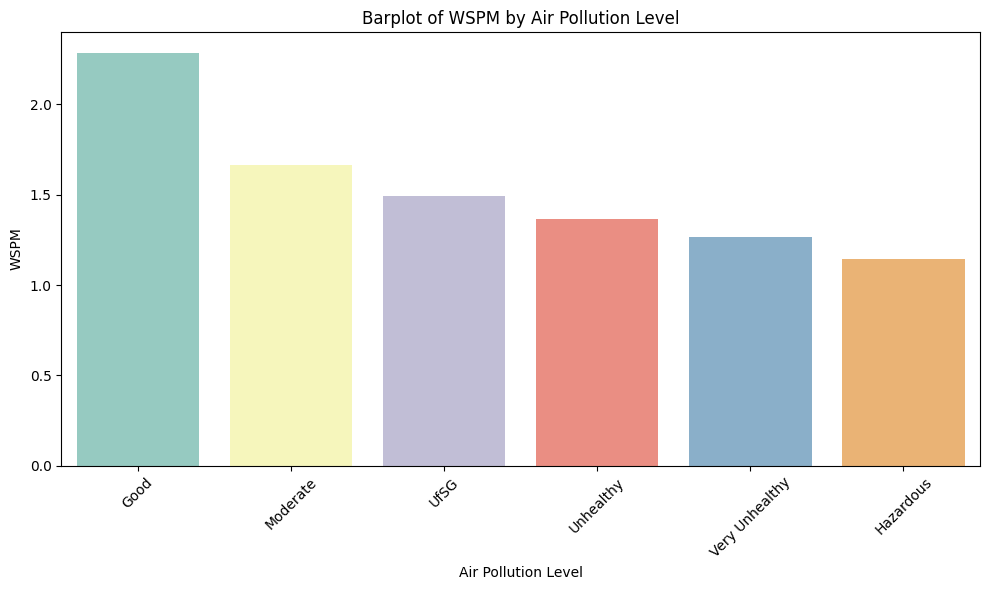

In [28]:
# Visualisasi berdasarkan "WSPM"

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Air Pollution Level (PM2.5)', y='WSPM', data=tiantan_df, palette='Set3')
plt.xlabel('Air Pollution Level')
plt.ylabel('WSPM')
plt.title('Boxplot of 03 by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Air Pollution Level (PM2.5)', y='WSPM', data=tiantan_df, palette='Set3', errorbar=None)
plt.xlabel('Air Pollution Level')
plt.ylabel('WSPM')
plt.title('Barplot of WSPM by Air Pollution Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari visualisasi data diatas kita dapat melihat variabel apa saja yang berpengaruh terhadap kualitas udara Kota Tiantan. Namun jika kita mau lihat lebih jauh lagi kita dapat menggunakan heatmap. 

C:\Users\Asus\AppData\Local\Temp\ipykernel_19016\2349557301.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tiantan_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


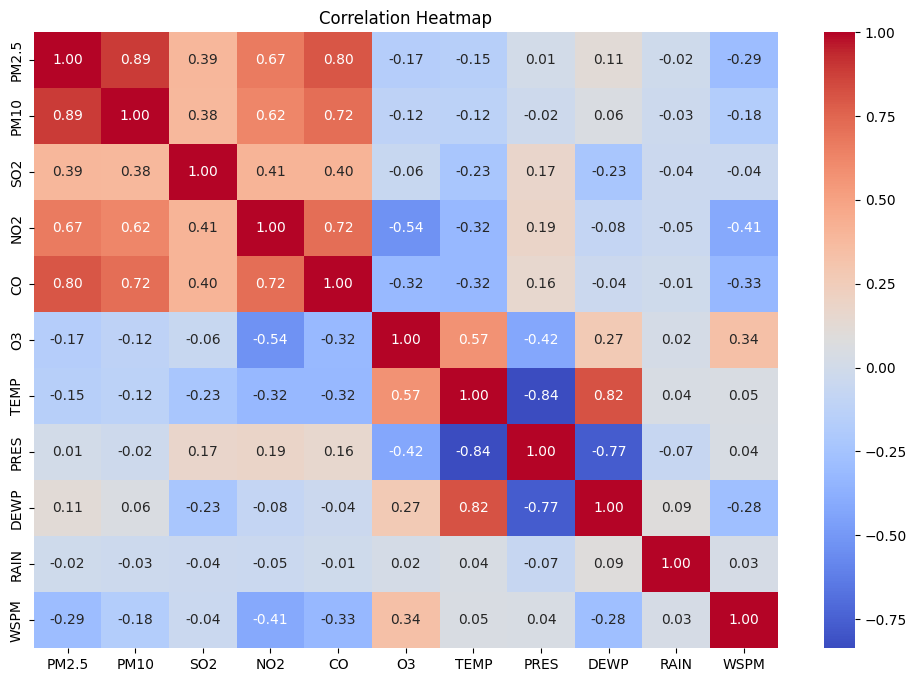

In [29]:
# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tiantan_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Selain hal diatas, variabel dengan nilai korelasi yang  tinggi kemungkinan besar memiliki pengaruh yang lebih besar dalam menentukan semakin buruknya kualitas udara.

In [30]:
# Menghitung korelasi antara variabel numerik
correlation_matrix = tiantan_df.corr()

# Menampilkan korelasi dengan variabel 'Air Pollution Level (PM2.5)'
air_pollution_correlation = correlation_matrix['PM2.5'].sort_values(ascending=False)

print(air_pollution_correlation)

PM2.5    1.000000
PM10     0.891237
CO       0.801057
NO2      0.665743
SO2      0.394558
DEWP     0.111555
PRES     0.009397
RAIN    -0.015966
TEMP    -0.152213
O3      -0.169217
WSPM    -0.291975
Name: PM2.5, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_19016\3906706732.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = tiantan_df.corr()


### Pertanyaan 3: Bagaimana trend kualitas udara Kota Tiantan?

In [31]:
air_polution_year = tiantan_df.groupby(by = ['year'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"}).sort_values(by = ['year'], ascending = True)
air_polution_year = air_polution_year.reset_index()
air_polution_year['time'] = air_polution_year["year"].astype(str)
air_polution_year.head(10)

,year,PM2.5,PM10,SO2,NO2,CO,O3,time
0,2013,83.210172,108.312704,18.202909,53.174606,1311.649714,55.159147,2013
1,2014,86.689874,114.889526,19.771678,56.159241,1338.590183,56.664224,2014
2,2015,82.061081,102.860498,11.809139,52.014256,1302.433173,60.385629,2015
3,2016,73.782176,97.296476,8.976547,49.940739,1195.698433,55.711074,2016
4,2017,97.902245,125.942795,14.056481,63.921434,1756.770456,35.933020,2017


In [32]:
def air_polution_graph(df):
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

    ax[0,0].plot(df['time'], df['PM2.5'], marker='o', linewidth=2, color="#39064B")
    ax[0,0].tick_params(axis='y', labelsize=20)
    ax[0,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0,0].set_ylabel("PM2.5", fontsize=25)
    ax[0,0].set_title("PM2.5", loc="center", fontsize=35)

    ax[0,1].plot(df['time'], df['PM10'], marker='o', linewidth=2, color="#39064B")
    ax[0,1].tick_params(axis='y', labelsize=20)
    ax[0,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0,1].set_ylabel("PM10", fontsize=25)
    ax[0,1].set_title("PM10", loc="center", fontsize=35)

    ax[1,0].plot(df['time'], df['SO2'], marker='o', linewidth=2, color="#39064B")
    ax[1,0].tick_params(axis='y', labelsize=20)
    ax[1,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1,0].set_ylabel("SO2", fontsize=25)
    ax[1,0].set_title("SO2", loc="center", fontsize=35)

    ax[1,1].plot(df['time'], df['NO2'], marker='o', linewidth=2, color="#39064B")
    ax[1,1].tick_params(axis='y', labelsize=20)
    ax[1,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1,1].set_ylabel("NO2", fontsize=25)
    ax[1,1].set_title("NO2", loc="center", fontsize=35)


    ax[2,0].plot(df['time'], df['CO'], marker='o', linewidth=2, color="#39064B")
    ax[2,0].tick_params(axis='y', labelsize=20)
    ax[2,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[2,0].set_ylabel("CO", fontsize=25)
    ax[2,0].set_title("CO", loc="center", fontsize=35)


    ax[2,1].plot(df['time'], df['O3'], marker='o', linewidth=2, color="#39064B")
    ax[2,1].tick_params(axis='y', labelsize=20)
    ax[2,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[2,1].set_ylabel("O3", fontsize=25)
    ax[2,1].set_title("O3", loc="center", fontsize=35)

    fig.tight_layout(pad=2.0)

    plt.suptitle("Trend Tingkat Polusi Udara di Aotizhongxin", fontsize=45, y=1.05)
    plt.show()

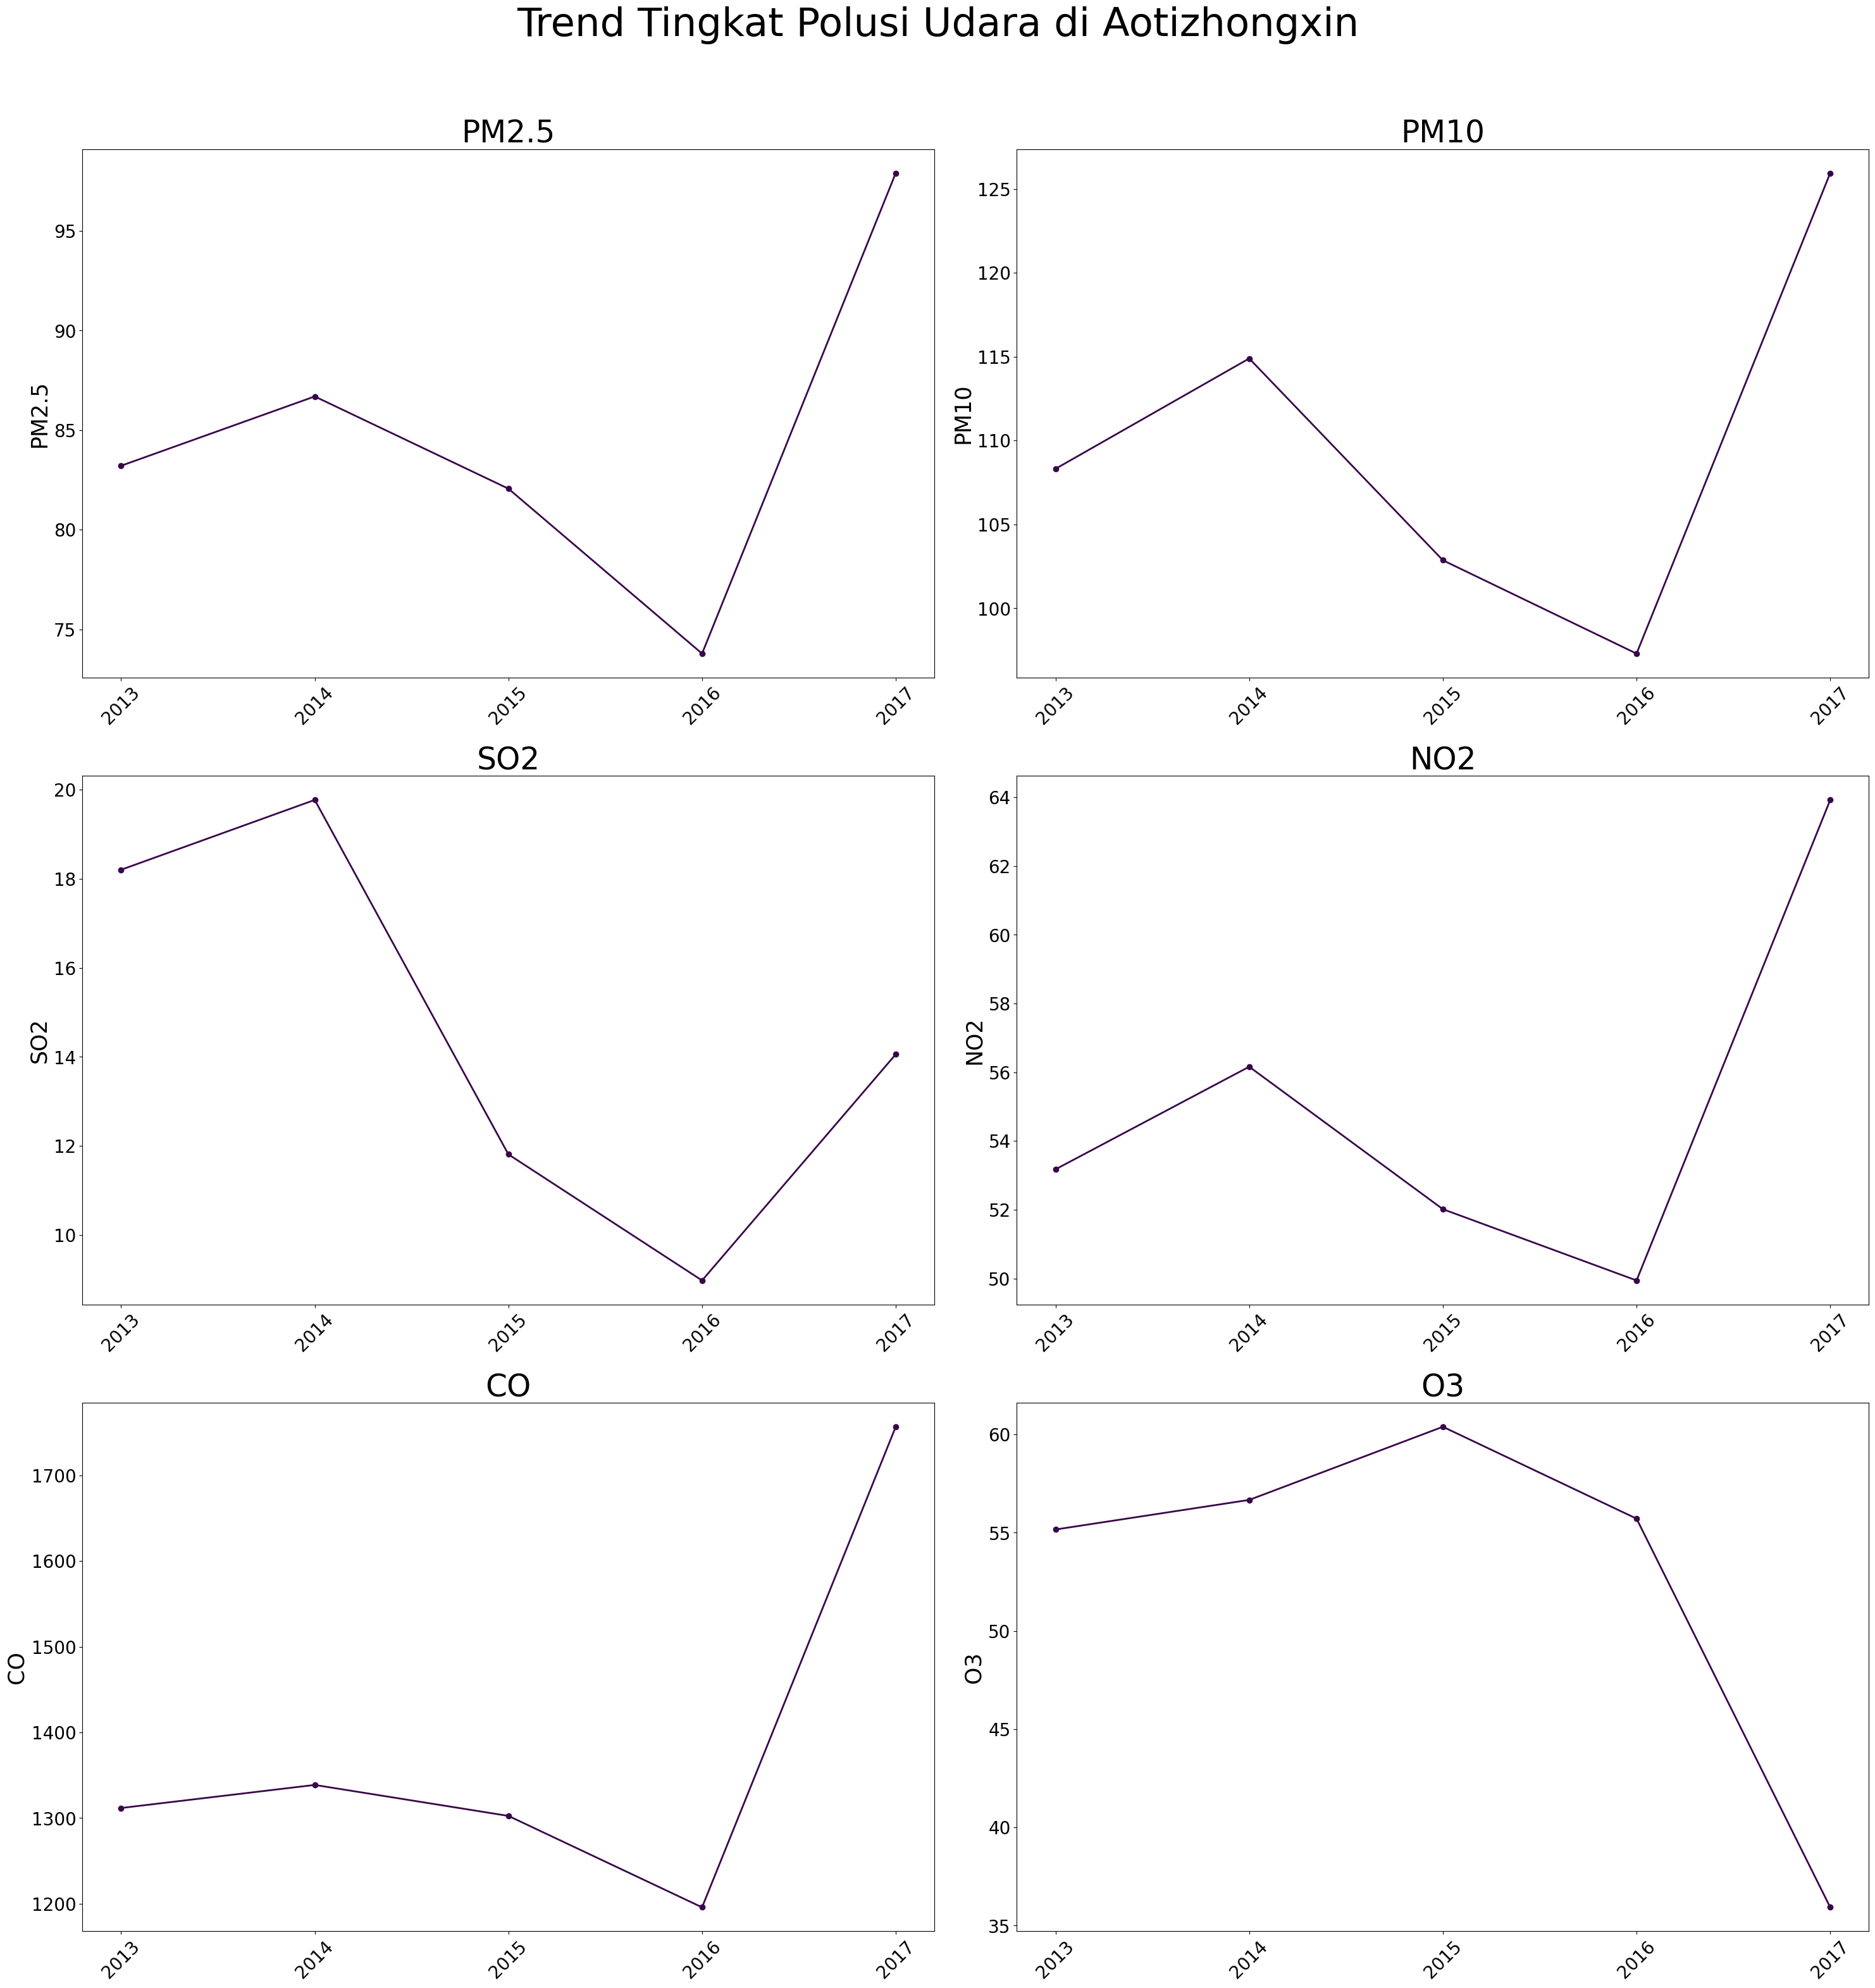

In [33]:
air_polution_graph(air_polution_year.head())

## Conclusion

- Proporsi tertinggi level polusi udara Kota Tiantan yaitu adalah "Good" sebesar 45,1% dan yang paling rendah Hazardous sebesar 2,3% dalam 5 Tahun
- Variabel yang paling berpengaruh dalam mementukan level udara kota tiantan adalah "CO" jika menganggap variabel PM2.5 dan PM10 sebagai pembentuk variabel baru "level pulusi udara"
- Trend kualitas udara mengalami fluktuasi dalam kurun 5 tahun